# Quantium Data Analytics #

#### Analysis of Customer Segments and Chip purchasing behaviour


Importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data in the Pandas DataFrame

In [3]:
transaction_data=pd.read_csv('QVI_transaction_data.csv')
purchase_behaviour_data=pd.read_csv('QVI_purchase_behaviour.csv')

Now lets understand the both datasets and see the summaries of them

In [4]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Observation:
The transaction dataset contains 264836 rows, and it have got 7 featues.
The only problem that seems to be in this dataset is that the format of Date is incorrect. (In should be in date format, but it is in integer format)

Converting Date from Integer to date format

In [6]:
# The value in the date column seems like excel serial date numbers where the dates are stored as the numbers of days since december 30,1899.
transaction_data['DATE']=pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [7]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [8]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


---

In [10]:
purchase_behaviour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
purchase_behaviour_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Observation:
Purchase behaviour data have got 3 features and just 72637 data rows. Here all the features seems to be in the correct format.

---

Now first lets focus on the Transaction_data

Product Name

In [12]:
transaction_data['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [13]:
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Here we can notice that this dataset is entirely not about chips, as we can see some SALSA's around as well. Here as we are only dealing with chips, anything that mentions salsa is removed.

In [14]:
transaction_data['SALSA']=transaction_data['PROD_NAME'].str.lower().str.contains('salsa', na=False)
transaction_data['SALSA'].sum()

np.int64(18094)

In [15]:
ss=len(transaction_data['PROD_NAME'])
ss

264836

Among the 264836 rows of the PROD_NAME 18094 were SALSA, so we are going to remove it.

In [16]:
transaction_data=transaction_data[transaction_data['SALSA']==False].copy()
transaction_data=transaction_data.drop('SALSA',axis=1)

In [17]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


The new number of rows is 246742.

In [18]:
transaction_data['PROD_NAME'].describe()

count                                     246742
unique                                       105
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [19]:
top_product=transaction_data['PROD_NAME'].value_counts().index[0]

In [20]:
top_product

'Kettle Mozzarella   Basil & Pesto 175g'

Hence, from the summary of the Product Name of the Transaction Data, we found out that among 246742 data, there are only 105 unique product names
and among them the product with the top frequency of 3304 is Kettle Mozzarella Basil & Pesto 175g

Here we noticed that the product name have got certain special signs and numbers.
We don't require those hence we are going to remove them

But let's just store the sizes in another name, as it might carry some significance in the future.

Before doing that lets check whether there is a product or not that ends with the unit like g

In [21]:
not_ending_with_g=~transaction_data['PROD_NAME'].str.endswith('g')

In [22]:
transaction_data[not_ending_with_g]['PROD_NAME'].unique()

array(['Grain Waves Sour    Cream&Chives 210G',
       'Red Rock Deli Sp    Salt & Truffle 150G',
       'Smiths Thinly       Swt Chli&S/Cream175G',
       'Kettle 135g Swt Pot Sea Salt'], dtype=object)

So basically there are 4 products that doesnot end with g, among them three ends with G and the salt one have the size in the middle, that makes things interesting.

In [23]:
transaction_data['SIZES']=transaction_data['PROD_NAME'].str.extract(r'(\d+(?:\.\d+)?\s*(?i:g|kg|ml|l|oz))')

In [24]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [25]:
transaction_data['SIZES']=transaction_data['SIZES'].copy()

---

---

EXCEPTION CASE HANDLING

In [26]:
transaction_data[transaction_data['PROD_NAME']=='Kettle 135g Swt Pot Sea Salt']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
65,2019-05-20,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
153,2019-05-17,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,135g
174,2018-08-20,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
177,2019-05-17,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,135g
348,2018-10-26,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
...,...,...,...,...,...,...,...,...,...
264564,2018-10-08,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
264574,2019-06-12,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
264725,2018-07-20,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,135g
264767,2019-06-08,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g


In [27]:
transaction_data[transaction_data['PROD_NAME']=='Smiths Thinly       Swt Chli&S/Cream175G']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
35,2018-08-19,51,51100,46803,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,175G
421,2018-08-07,13,13010,11152,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G
428,2019-06-25,13,13010,11159,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G
527,2018-08-25,20,20329,17313,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,175G
879,2018-07-13,45,45126,41112,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G
...,...,...,...,...,...,...,...,...,...
263054,2019-04-25,195,195320,195230,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,175G
263310,2019-03-17,205,205252,204325,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G
263317,2018-07-01,205,205430,204503,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,175G
263429,2019-03-03,213,213088,212425,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175G


Handling of this two case proves that our code to extract the sizes from the Product Name is accurate and effective.

---

---

Now we can remove this from the product name

In [28]:
transaction_data['PROD_NAME']=transaction_data['PROD_NAME'].str.replace(r'\d+(?:\.\d+)?\s*(?i:g|k|ml|lb|oz)\b','',regex=True)
transaction_data['PROD_NAME']=transaction_data['PROD_NAME'].str.strip()

In [29]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150g


---

---

Exception Case Handling

In [30]:
transaction_data[transaction_data['PROD_NBR']==37]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
35,2018-08-19,51,51100,46803,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,175G
421,2018-08-07,13,13010,11152,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G
428,2019-06-25,13,13010,11159,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G
527,2018-08-25,20,20329,17313,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,175G
879,2018-07-13,45,45126,41112,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G
...,...,...,...,...,...,...,...,...,...
263054,2019-04-25,195,195320,195230,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,175G
263310,2019-03-17,205,205252,204325,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G
263317,2018-07-01,205,205430,204503,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,175G
263429,2019-03-03,213,213088,212425,37,Smiths Thinly Swt Chli&S/Cream,2,6.0,175G


In [31]:
transaction_data[transaction_data['PROD_NBR']==63]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
65,2019-05-20,83,83008,82099,63,Kettle Swt Pot Sea Salt,2,8.4,135g
153,2019-05-17,208,208139,206906,63,Kettle Swt Pot Sea Salt,1,4.2,135g
174,2018-08-20,237,237227,241132,63,Kettle Swt Pot Sea Salt,2,8.4,135g
177,2019-05-17,243,243070,246706,63,Kettle Swt Pot Sea Salt,1,4.2,135g
348,2018-10-26,7,7077,6604,63,Kettle Swt Pot Sea Salt,2,8.4,135g
...,...,...,...,...,...,...,...,...,...
264564,2018-10-08,260,260240,259480,63,Kettle Swt Pot Sea Salt,2,8.4,135g
264574,2019-06-12,261,261035,259860,63,Kettle Swt Pot Sea Salt,2,8.4,135g
264725,2018-07-20,266,266413,264246,63,Kettle Swt Pot Sea Salt,1,4.2,135g
264767,2019-06-08,269,269133,265839,63,Kettle Swt Pot Sea Salt,2,8.4,135g


This illustrates that even in deleting the sizes from the product Name my code block is working accurately.

---

---

### Sorting Product by Frequency

In [32]:
frequency_map=transaction_data['PROD_NAME'].value_counts()
frequency_map

PROD_NAME
Kettle Mozzarella   Basil & Pesto       3304
Kettle Tortilla ChpsHny&Jlpno Chili     3296
Cobs Popd Swt/Chlli &Sr/Cream Chips     3269
Tyrrells Crisps     Ched & Chives       3268
Cobs Popd Sea Salt  Chips               3265
                                        ... 
Sunbites Whlegrn    Crisps Frch/Onin    1432
RRD Pc Sea Salt                         1431
NCC Sour Cream &    Garden Chives       1419
French Fries Potato Chips               1418
WW Crinkle Cut      Original            1410
Name: count, Length: 105, dtype: int64

In [33]:
transaction_data['PROD_freq']=transaction_data['PROD_NAME'].map(frequency_map)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g,1468
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g,1498
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g,1484
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175g,1473
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150g,3296


In [34]:
transaction_data_sorted=transaction_data.sort_values('PROD_freq', ascending=False)
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175g,3304
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304


In [35]:
transaction_data_sorted.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
168217,2019-04-20,225,225142,225521,72,WW Crinkle Cut Original,2,3.4,175g,1410
76369,2019-03-26,160,160161,161150,72,WW Crinkle Cut Original,2,3.4,175g,1410
230584,2018-11-14,53,53110,47364,72,WW Crinkle Cut Original,1,1.7,175g,1410
65016,2019-04-20,178,178228,178998,72,WW Crinkle Cut Original,2,3.4,175g,1410
68668,2019-06-03,259,259013,257496,72,WW Crinkle Cut Original,2,3.4,175g,1410


In [36]:
transaction_data_sorted.drop('PROD_freq', axis=1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175g
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g
...,...,...,...,...,...,...,...,...,...
168217,2019-04-20,225,225142,225521,72,WW Crinkle Cut Original,2,3.4,175g
76369,2019-03-26,160,160161,161150,72,WW Crinkle Cut Original,2,3.4,175g
230584,2018-11-14,53,53110,47364,72,WW Crinkle Cut Original,1,1.7,175g
65016,2019-04-20,178,178228,178998,72,WW Crinkle Cut Original,2,3.4,175g


transaction_data_sorted is our new data frame with product name and other values sorted in the order of highest frequency to the lowest frequency

---

### SORTED DATA SUMMARY, STATISTICS

In [37]:
transaction_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 137549 to 68668
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
 8   SIZES           246742 non-null  object        
 9   PROD_freq       246742 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.7+ MB


In [38]:
transaction_data_sorted.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_freq
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,2651.619359
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1410.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,1516.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,3134.000000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,3174.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,3304.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,777.492767


#### Observation
1. None of the dataset have any null values
2. We don't have std of Date as it doesnot make sense.
3. In product quantity we are observing a maximum quantity of 200, that seems uncommon for chips.

In [39]:
transaction_data_sorted[transaction_data_sorted['PROD_QTY']==200.00]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380g,3185
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380g,3185


So there were two ocassions where the maximum product quanity of 200 was sold.
In both the cases it was the DORITO CORN CHP SUPREME.

Interesting fact about it is , the LYLTY_CARD_NUMBER is the SAME and it was bought on the SAME STORE, hence both the product was bought by the same customers. So let's check if the customer has had other transaction or not.

In [40]:
transaction_data_sorted[transaction_data_sorted['LYLTY_CARD_NBR']== 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380g,3185
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380g,3185


No, this customer have made only these two purchase, which is the maximum purchase and they don't have purchased anything else. It seems like they are not any ordinary retail customers 
and are buying chips for like a wholesale purpose, hence we will remove this loyalty card number from further analysis.

In [41]:
transaction_data_sorted=transaction_data_sorted[transaction_data_sorted['LYLTY_CARD_NBR']!= 226000].copy()

In [42]:
transaction_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 137549 to 68668
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   SIZES           246740 non-null  object        
 9   PROD_freq       246740 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.7+ MB


Now the two row with max purchase amount is removed.
Now lets check the summary statistics again.

In [43]:
transaction_data_sorted.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_freq
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569600,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,2651.615036
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1410.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,1516.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,3134.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,3174.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,3304.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,777.494435


Hence the max product quantity is now 5, which seems reasonable.

---

### Lets groupby the number of transaction by date

In [44]:
transaction_by_date=transaction_data_sorted.groupby('DATE').size()
transaction_by_date

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64

In [45]:
existing_dates=transaction_data_sorted['DATE'].sort_values().unique()

In [46]:
full_range=pd.date_range(start='2018-07-01',end='2019-06-30')

In [47]:
missing_dates=full_range.difference(existing_dates)
missing_dates

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

Here we can see that the data of 2018 December 25, which is Christmas day is missing.

In [48]:
transaction_by_date=transaction_by_date.reset_index()
transaction_by_date.columns=['DATE','COUNTS']

In [49]:
transaction_by_date

,DATE,COUNTS
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [50]:
transaction_by_date=transaction_by_date.set_index('DATE').reindex(full_range,fill_value=0)
transaction_by_date=transaction_by_date.reset_index()
transaction_by_date.columns=['DATE','COUNTS']



In [51]:
transaction_by_date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    365 non-null    datetime64[ns]
 1   COUNTS  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


---

LET's PLOT Number of transaction by date

In [52]:
import plotly.express as px


In [53]:
fig=px.line(transaction_by_date, x='DATE', y='COUNTS')

fig.update_layout(title='Transactions Over Time',yaxis_title='Number of Transactions',xaxis=dict(dtick="M1", tickformat="%b %Y"),hovermode='x unified')
fig.add_annotation(
    x='2018-12-25',
    y=0,
    text="No sales on Christmas Day",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="red",
    ax=50,
    ay=-40,
    bgcolor="white",
    bordercolor="red",
    borderwidth=2
)
fig.show()


The steep drop observed here is the data of christmas day, where the store was closed and there were no sales.

---

### SIZES

In [54]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175g,3304
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304


In [55]:
transaction_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 137549 to 68668
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   SIZES           246740 non-null  object        
 9   PROD_freq       246740 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.7+ MB


Here we can see that the sizes is an object so lets make gm a standard size and convert every value to g and convert the feature into a integer

In [56]:
transaction_data_sorted[['SIZE_VALUES','SIZE_UNIT']]=transaction_data_sorted['SIZES'].str.extract(r'(\d+(?:\.\d+)?)\s*([a-zA-Z]+)')
transaction_data_sorted['SIZE_VALUES']=pd.to_numeric(transaction_data_sorted['SIZE_VALUES'])
transaction_data_sorted['SIZE_UNIT']=transaction_data_sorted['SIZE_UNIT']

In [57]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZES,PROD_freq,SIZE_VALUES,SIZE_UNIT
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304,175,g
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304,175,g
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304,175,g
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175g,3304,175,g
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175g,3304,175,g


In [58]:
transaction_data_sorted['SIZE_UNIT'].unique()

array(['g', 'G'], dtype=object)

Here we see that all units are in Grams hence its remove the size UNIT and modify the title of the SIZE_VALUES

In [59]:
transaction_data_sorted=transaction_data_sorted.drop(columns=['SIZE_UNIT','SIZES'], axis=1)

In [60]:
transaction_data_sorted=transaction_data_sorted.rename(columns={'SIZE_VALUES':'SIZE_VALUES(GRAM)'})

In [61]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_freq,SIZE_VALUES(GRAM)
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,3304,175
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175


In [62]:
transaction_data_sorted['SIZE_VALUES(GRAM)'].max()

np.int64(380)

In [63]:
transaction_data_sorted['SIZE_VALUES(GRAM)'].min()

np.int64(70)

The maximum size of the packet is 380 gram and the minimum size of the packet is 70 gram.

##### VISUALIZING THE NUMBER OF TRANSACTION BY PACKET SIZE

In [64]:
transaction_by_sizes=transaction_data_sorted.groupby('SIZE_VALUES(GRAM)').size()

In [65]:
transaction_by_sizes.head()


SIZE_VALUES(GRAM)
70      1507
90      3008
110    22387
125     1454
134    25102
dtype: int64

In [66]:
transaction_by_sizes=transaction_by_sizes.reset_index()
transaction_by_sizes.columns=['SIZES','TRANSACTION']

In [67]:
transaction_by_sizes.tail()

,SIZES,TRANSACTION
15,220,1564
16,250,3169
17,270,6285
18,330,12540
19,380,6416


In [68]:
transaction_by_sizes['SIZES'].unique()

array([ 70,  90, 110, 125, 134, 135, 150, 160, 165, 170, 175, 180, 190,
       200, 210, 220, 250, 270, 330, 380])

/var/folders/k6/dk7cqd9513v3sf54fjc78_fr0000gn/T/ipykernel_66369/541003572.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'TRANSACTION PER PACKET SIZES')

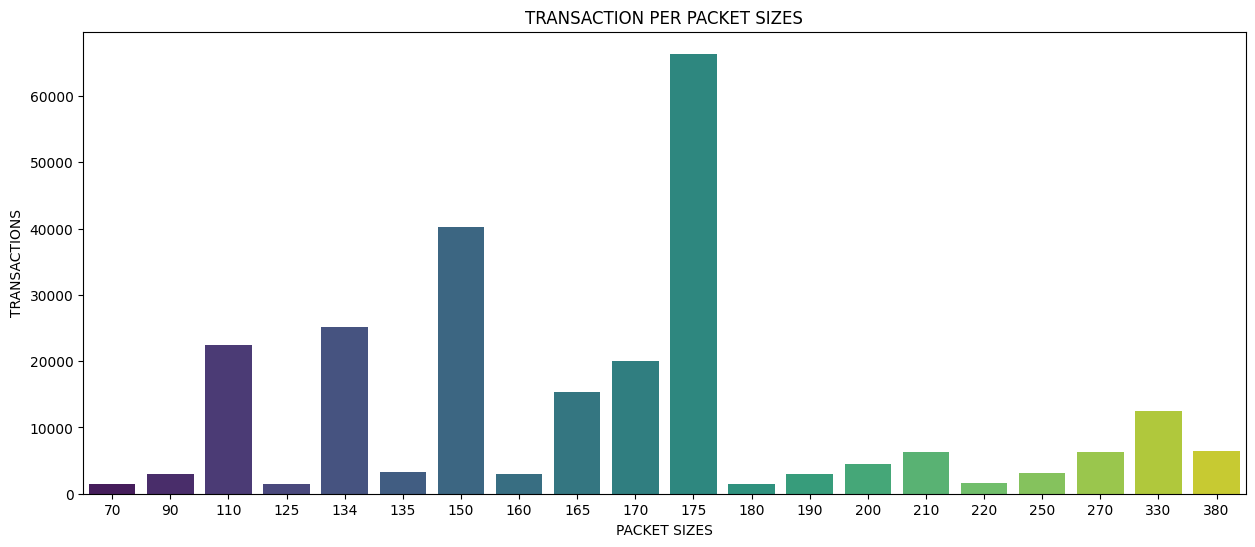

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(transaction_by_sizes,x='SIZES', y='TRANSACTION',palette='viridis')
plt.xlabel("PACKET SIZES")
plt.ylabel("TRANSACTIONS")
plt.title("TRANSACTION PER PACKET SIZES")


---

## BRAND_NAME

In [70]:
transaction_data_sorted['BRAND_NAME']=transaction_data_sorted['PROD_NAME'].str.extract(r'^(\S+)')

In [71]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_freq,SIZE_VALUES(GRAM),BRAND_NAME
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,3304,175,Kettle
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle


In [72]:
transaction_data_sorted[transaction_data_sorted['BRAND_NAME']=='NCC']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_freq,SIZE_VALUES(GRAM),BRAND_NAME
30926,2019-06-30,74,74260,73117,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
220112,2019-06-28,71,71075,69407,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
60068,2018-11-21,90,90327,89052,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
132380,2018-07-14,225,225071,225088,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
132372,2018-11-29,225,225055,224991,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
...,...,...,...,...,...,...,...,...,...,...,...
243975,2019-02-12,70,70199,68636,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
53596,2018-07-21,247,247013,248682,98,NCC Sour Cream & Garden Chives,2,6.0,1419,175,NCC
28217,2018-09-02,1,1318,361,98,NCC Sour Cream & Garden Chives,1,3.0,1419,175,NCC
198460,2018-12-17,185,185072,187902,98,NCC Sour Cream & Garden Chives,1,3.0,1419,175,NCC


In [73]:
transaction_data_sorted['BRAND_NAME'].unique()

array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smiths',
       'Thins', 'Doritos', 'Pringles', 'Dorito', 'Twisties', 'Grain',
       'Cheezels', 'Infzns', 'Snbts', 'Natural', 'Burger', 'CCs', 'RRD',
       'Woolworths', 'Smith', 'WW', 'Red', 'Cheetos', 'GrnWves',
       'Sunbites', 'NCC', 'French'], dtype=object)

In [74]:
len(transaction_data_sorted['BRAND_NAME'].unique())

28

Here we can see some BRAND NAMES ARE THE SAME 
1. Red and RRD
1. Doritos and Dorito
1. Smiths and Smith
1. Infuzions and Infzns
1. Snbts and Sunbites
1. Grain and GrnWVES--> Grain Waves


In [75]:
brand_replacement_map={
    'RRD':'Red',
    'Dorito':'Doritos',
    'Smith':'Smiths',
    'Infzns': 'Infuzions',
    'Snbts':'Sunbites',
    'Grain':'Grain Waves',
    'GrnWVES':'Grain Waves'
}

In [76]:
transaction_data_sorted['BRAND_NAME']=transaction_data_sorted['BRAND_NAME'].replace(brand_replacement_map)

In [77]:
transaction_data_sorted['BRAND_NAME'].unique()

array(['Kettle', 'Cobs', 'Tyrrells', 'Tostitos', 'Infuzions', 'Smiths',
       'Thins', 'Doritos', 'Pringles', 'Twisties', 'Grain Waves',
       'Cheezels', 'Sunbites', 'Natural', 'Burger', 'CCs', 'Red',
       'Woolworths', 'WW', 'Cheetos', 'GrnWves', 'NCC', 'French'],
      dtype=object)

In [78]:
len(transaction_data_sorted['BRAND_NAME'].unique())

23

In [79]:
transaction_data_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_freq,SIZE_VALUES(GRAM),BRAND_NAME
137549,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
149057,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
91915,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle
37807,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,3304,175,Kettle
245585,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,3304,175,Kettle


In [80]:
transaction_data_sorted['LYLTY_CARD_NBR'].unique()

array([ 34057, 245223, 160226, ..., 186423,  51129,   9297],
      shape=(71287,))

Now it seems the Brand Name is also sorted and the entire transaction_data is sorted.

---

# Customer's Purchase Behaviour Data

In [81]:
purchase_behaviour_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [82]:
purchase_behaviour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [83]:
purchase_behaviour_data.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [84]:
purchase_behaviour_data['LYLTY_CARD_NBR'].unique()

array([   1000,    1002,    1003, ..., 2370751, 2370961, 2373711],
      shape=(72637,))

So basically in the transaction data there are 71287 unique LYLTY_CARD_NBR whereas here in customer's purchase behaviour dataframe there are 72637 unique customer LYLTY_CARD_NBR. <br>

Reason: <br>
In the Transaction dataframe, I had deleted the data about SALSA, which is most probably present in this purchase behaviour dataframe. <br>

Solution<br>
We need to keep all the data from the transaction dataframe and just keep the data that matches the data from the transaction data frame into a new_dataframe<br>
For that I am using left merge, making transaction data my reference dataframe.

In [85]:
merged_df=transaction_data_sorted.merge(purchase_behaviour_data, on='LYLTY_CARD_NBR', how='left')

In [86]:
merged_df.drop(columns='PROD_freq', axis=1, inplace=True)

In [87]:
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_VALUES(GRAM),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget
1,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget
2,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,OLDER SINGLES/COUPLES,Budget
3,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175,Kettle,OLDER FAMILIES,Budget
4,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-04-20,225,225142,225521,72,WW Crinkle Cut Original,2,3.4,175,WW,RETIREES,Mainstream
246736,2019-03-26,160,160161,161150,72,WW Crinkle Cut Original,2,3.4,175,WW,OLDER FAMILIES,Premium
246737,2018-11-14,53,53110,47364,72,WW Crinkle Cut Original,1,1.7,175,WW,YOUNG SINGLES/COUPLES,Budget
246738,2019-04-20,178,178228,178998,72,WW Crinkle Cut Original,2,3.4,175,WW,OLDER FAMILIES,Mainstream


In [88]:
merged_df['LYLTY_CARD_NBR'].unique()

array([ 34057, 245223, 160226, ..., 186423,  51129,   9297],
      shape=(71287,))

The left join worked perfectly.

In [89]:
merged_df.to_csv('/Users/mriduldhungana/Documents/Forage Project/Quantium-Data-Analytics/merged_data.csv',index=False)

---

---

### <center>Data Analysis on Customer Segment</center>

Basically the questions we can ask here are:
1. Who spends the most on the chips (Customers of which Lifestage?)<br>
    (Customer of which lifestage belongs to which category)

1. How many customers are in each segment? <br>
    (What is the distribution of customers in each segment(Percentile of people and there effects))

1. How many chips are bought by the customer of the particular segment?<br>
    In what criteria is the customer classified as Budget, Mainstream and Premium (Whats the average transaction quantity and average chip price)

1. Over the period of time, whats the total expenditure of customer segments? <br>
    How it is or it is not different from the expenditure per transaction.


---

1. The most important question to clarify first is
'In what criteria is the customer classified as Budget, Mainstream and Premium'

In [90]:
merged_df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    95043
Budget        86762
Premium       64935
Name: count, dtype: int64

So all together there are around 95k Mainstream customers
86k Budget Customers and around 65K premium customers <br>

Basically Mainstream customers are at the highest count and the Premium customers are at the lowest count

Lets understand the total sales per mainstream customers


In [91]:
merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()

PREMIUM_CUSTOMER
Budget        7.277458
Mainstream    7.374193
Premium       7.282751
Name: TOT_SALES, dtype: float64

The average of total sales, i.e. average money spent seems to be equal among all the three different customer segments, but before going into the conclusion that it is not a differentiating point, lets perform other operations as well, as this subtle differences may also be significant.

In [92]:
merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

PREMIUM_CUSTOMER
Budget        631406.85
Mainstream    700865.40
Premium       472905.45
Name: TOT_SALES, dtype: float64

This analysis of calculating the sum maynot be as useful as the number of different premium customers are different hence this can justify the changes in values.

So basically as the number of premium customers are different and the average sales between different premium customers don't have much deviation,
it is hard to consider it as a significant differentiating factor.

* But one thing that may differentiate maybe the frequency of the chips bought

In [93]:
transaction_per_customers=merged_df.groupby(['PREMIUM_CUSTOMER','LYLTY_CARD_NBR']).size()

In [94]:
avg_frequency=transaction_per_customers.groupby(level=0).mean()
avg_frequency

PREMIUM_CUSTOMER
Budget        3.614180
Mainstream    3.307684
Premium       3.501105
dtype: float64

Even the average frequency of the customers purchase seems to be same.

* Price per item

In [95]:
merged_df['Price_per_item']=merged_df['TOT_SALES']/merged_df['PROD_QTY']


In [96]:
price_per_item=merged_df.groupby('PREMIUM_CUSTOMER')['Price_per_item'].mean()
price_per_item

PREMIUM_CUSTOMER
Budget        3.801726
Mainstream    3.873657
Premium       3.813059
Name: Price_per_item, dtype: float64

The thing here is the price_per_item of mainstream customer is maximum i.e. 3.87, but the catch is the budget customer's price per item and premium
customer's  price per item is less than mainstream customers and they don't even have much difference.

Hence for now we can say that price in itself may not be the differentiating factor.

---

Product Quantity 


In [97]:
merged_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].mean()

PREMIUM_CUSTOMER
Budget        1.910675
Mainstream    1.902086
Premium       1.907215
Name: PROD_QTY, dtype: float64

Even the product quantity bought is also the same.
This can be intuitive as if the average product quantity is same, then only the average prize can be this same.

---

Store Number

In [140]:
merged_df['STORE_NBR'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [106]:
customers_storeNBR=merged_df.groupby(['PREMIUM_CUSTOMER','STORE_NBR']).size().reset_index(name='count')
customers_storeNBR

,PREMIUM_CUSTOMER,STORE_NBR,count
0,Budget,1,179
1,Budget,2,157
2,Budget,3,518
3,Budget,4,489
4,Budget,5,494
...,...,...,...
796,Premium,268,128
797,Premium,269,426
798,Premium,270,366
799,Premium,271,358


In [135]:
Budget_Unique_store_NBR=customers_storeNBR[customers_storeNBR['PREMIUM_CUSTOMER']=='Budget']['STORE_NBR'].unique()
Budget_Unique_store_NBR

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [136]:
Store_list=list(Budget_Unique_store_NBR)
hypothetical_list=list(range(1,273))
result= Store_list==hypothetical_list

print('True' if result else 'False')

False


This show that not all the stores between 1 to 273 are the stores where Budget customers shop from. 
Show what maybe the remaining stores?

In [133]:
remaining=[x for x in hypothetical_list if x not in Store_list]
remaining

[76, 92, 206, 211, 252]

So basically from Store number 1 to 272 except store (72,92,206,211,252) Budget customers shot

In [141]:
Mainstream_Unique_store_NBR=customers_storeNBR[customers_storeNBR['PREMIUM_CUSTOMER']=='Mainstream']['STORE_NBR'].unique()
mainsteam_list=list(Mainstream_Unique_store_NBR)
remaining_mainstream= [x for x in hypothetical_list if x not in mainsteam_list]

In [142]:
remaining_mainstream

[11, 85, 211, 252]

So from 11, 85, 211 and 252 the Mainstream customers do not purchase thing.

In [145]:
Premium_Unique_store_NBR=customers_storeNBR[customers_storeNBR['PREMIUM_CUSTOMER']=='Premium']['STORE_NBR'].unique()
premium_list= list(Premium_Unique_store_NBR)
remaining_premium= [x for x in hypothetical_list if x not in premium_list]
remaining_premium

[31, 76, 92, 193, 206, 211]

So premium customers don't buy from 31,76,92,193,206,211 store NBRs and buy from other all stores from 1 to 272.

So basically, 
Budget customers don't buy from stores 76, 92, 206,211,252
Mainstream customers buy from all including 76,92,206 but don't buy from 11, 85,211,252 (Budget customers and premium customers buy from  11, and 85) and premium customers buy from 252 as well.
Premium customers don't buy from store 31, 76, 92, 193, 206 and 211.

So, 
Store 252 is the store where only premium customers buys chips.
Store 211, none of the customers buy chips(it may be due to removing the salsa data)
Store 76 is the store where only the mainstream customers buy the chips
 

This illustrates that the store numbers can be a differentiating factor.

---

2. Who spends the most on chips?

In [99]:
result=merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().reset_index(name='count')
result['percentage']=result.groupby('LIFESTAGE')['count'].transform(lambda x: 100*x/x.sum()).round(2)

In [100]:
pivot=result.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER',values='percentage')

In [101]:
pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,20.05,47.42,32.53
NEW FAMILIES,43.47,33.63,22.90
OLDER FAMILIES,47.64,29.32,23.04
OLDER SINGLES/COUPLES,33.81,33.59,32.60
RETIREES,30.64,43.01,26.35
YOUNG FAMILIES,43.87,29.50,26.63
YOUNG SINGLES/COUPLES,25.24,57.53,17.23


Findings:
1. OLDER FAMILIES had highest percentage of Budget Customers and lowest percentage of Mainstream customers among all
1. Young Singles/ Couples had highest percentage of Mainstream customer and lowest percentage of premium customers among other lifestages
1. Older singles and couples are highest percentage of premium customers, just little more that the MIDAGE SINGLES AND COUPLES.

#### AMONG THE ENTIRE PREMIUM CUSTOMERS LETS CHECK HOW MANY PERCENTAGE BELONGED TO DIFFERENT LIFESTAGES

In [102]:
result_1=merged_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().reset_index(name='count')
result_1['percentage']=result_1.groupby('PREMIUM_CUSTOMER')['count'].transform(lambda x: 100*x/x.sum()).round(2)

In [103]:
pivot_1=result_1.pivot(index='PREMIUM_CUSTOMER',columns='LIFESTAGE',values='percentage')

In [104]:
pivot_1

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,5.41,3.25,24.80,19.79,16.40,20.47,9.88
Mainstream,11.67,2.30,13.93,17.95,21.01,12.57,20.56
Premium,11.72,2.29,16.02,25.50,18.84,16.61,9.01


Findings:
1. Among the Budget Customers  20.47% of the entire Budget customer was young family (which was the highest), whereas 3.25% of the entire budget customers 
were the new families which is the lowest. <br>
('While buying chips new family apparently spend more cimpared to the older families')<br>

1. Around 21% of mainstream customers and 20.56% of mainstream customers are RETIREES and Young Singles/ COup